<a href="https://colab.research.google.com/github/mulcahrj/6999_Capstone/blob/main/DATA6999_XGBoost_Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/DATA6999/selected_features.csv",na_values='-')

In [4]:
df.head(5)

,InscClaimAmtReimbursed,Hospitalization_Duration,NoOfMonths_PartBCov,NoOfMonths_PartACov,Claim_Period,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Patient_Age,Patient_Risk_Score,ChronicCond_Alzheimer,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,Gender_1,Gender_2,Race_1,PotentialFraud,Provider
0,0.994980,1.000000,1.0,1.0,0.991831,0.998780,0.056535,0.395268,0.602524,1,0,1,1,0,1,1,PRV55912
1,0.204499,0.000000,1.0,1.0,0.000000,0.997524,0.204382,0.548797,0.351837,1,0,0,1,0,1,1,PRV55912
2,0.992624,1.000000,1.0,1.0,0.998328,0.996393,0.073183,0.889586,0.436861,1,0,0,0,1,1,1,PRV55912
3,0.991593,1.000000,1.0,1.0,0.999427,0.995721,0.373397,0.707005,0.177925,0,1,0,1,0,1,1,PRV55912
4,0.988580,0.999998,1.0,1.0,0.981119,0.997969,0.204382,0.564990,0.520349,0,1,1,0,1,1,1,PRV55912


In [5]:
provider = df['Provider']

In [6]:
df = df.drop('Provider', axis=1)

In [7]:
df.head(5)

,InscClaimAmtReimbursed,Hospitalization_Duration,NoOfMonths_PartBCov,NoOfMonths_PartACov,Claim_Period,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,Patient_Age,Patient_Risk_Score,ChronicCond_Alzheimer,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,Gender_1,Gender_2,Race_1,PotentialFraud
0,0.994980,1.000000,1.0,1.0,0.991831,0.998780,0.056535,0.395268,0.602524,1,0,1,1,0,1,1
1,0.204499,0.000000,1.0,1.0,0.000000,0.997524,0.204382,0.548797,0.351837,1,0,0,1,0,1,1
2,0.992624,1.000000,1.0,1.0,0.998328,0.996393,0.073183,0.889586,0.436861,1,0,0,0,1,1,1
3,0.991593,1.000000,1.0,1.0,0.999427,0.995721,0.373397,0.707005,0.177925,0,1,0,1,0,1,1
4,0.988580,0.999998,1.0,1.0,0.981119,0.997969,0.204382,0.564990,0.520349,0,1,1,0,1,1,1


In [8]:
# import required packages for splitting data
from sklearn import model_selection
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import 'XG Boost' model
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier


# balance the data
from imblearn.over_sampling import SMOTE

In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .25, train_size = .75)

In [ ]:
hyp = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.01],
    'n_estimators': [150, 300]
    }

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
#Create a XGB Classifier with tuning
gs = GridSearchCV(estimator=estimator,param_grid=hyp,n_jobs=-1)

In [ ]:
#Train the model using the training sets
gs.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.01], 'max_depth': [3, 5, 7],
                         'n_estimators': [150, 300]})

In [ ]:
gs.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [11]:
#Create a XGB Classifier
xgb = xgb.XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=7,feature_names=list(df.columns))

#Train the model using the training sets
xgb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = xgb.predict(x_test)

[00:01:38] WARNING: ../src/learner.cc:767: 
Parameters: { "feature_names" } are not used.



In [12]:
df_pred = pd.DataFrame(x_test,columns=list(df.iloc[:,:-1]))

In [13]:
df_pred['PotentialFraud'] = y_test

In [14]:
df_pred['PredictedFraud'] = y_pred

In [15]:
df_pred = provider.to_frame().join(df_pred, how='inner')

In [16]:
df_pred.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Provider,139553,294,PRV51459,8240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,139553.0,NaN,NaN,NaN,0.404646,0.303106,0.0,0.168756,0.297619,0.625431,1.0
Hospitalization_Duration,139553.0,NaN,NaN,NaN,0.072408,0.259146,0.0,0.0,0.0,0.0,1.0
NoOfMonths_PartBCov,139553.0,NaN,NaN,NaN,0.992354,0.087106,0.0,1.0,1.0,1.0,1.0
NoOfMonths_PartACov,139553.0,NaN,NaN,NaN,0.993773,0.078666,0.0,1.0,1.0,1.0,1.0
Claim_Period,139553.0,NaN,NaN,NaN,0.179388,0.374896,0.0,0.0,0.0,0.0,1.0
IPAnnualReimbursementAmt,139553.0,NaN,NaN,NaN,0.953196,0.025949,0.0,0.935341,0.935341,0.983984,1.0
OPAnnualReimbursementAmt,139553.0,NaN,NaN,NaN,0.40754,0.230305,0.004482,0.211119,0.39949,0.590867,1.0
Patient_Age,139553.0,NaN,NaN,NaN,0.508607,0.180902,0.0,0.407686,0.502575,0.615749,1.0
Patient_Risk_Score,139553.0,NaN,NaN,NaN,0.407274,0.210472,0.0,0.265454,0.436861,0.602524,1.0


In [17]:
xgb.feature_importances_

array([0.01478875, 0.60222316, 0.02644906, 0.02705711, 0.01869675,
       0.03546506, 0.03903886, 0.03427226, 0.0335126 , 0.03282969,
       0.03298914, 0.03414378, 0.03341474, 0.        , 0.03511919],
      dtype=float32)

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6333651014309976
Precision: 0.5987648544961168
Recall: 0.12011036864629476


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.95      0.76     86277
           1       0.60      0.12      0.20     53276

    accuracy                           0.63    139553
   macro avg       0.62      0.54      0.48    139553
weighted avg       0.62      0.63      0.55    139553



In [20]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[81989,  4288],
       [46877,  6399]])

Text(0.5, 427.9555555555555, 'Predicted label')

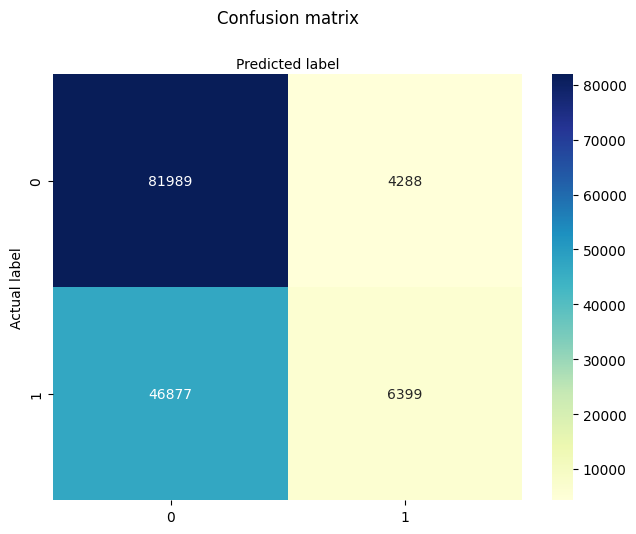

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

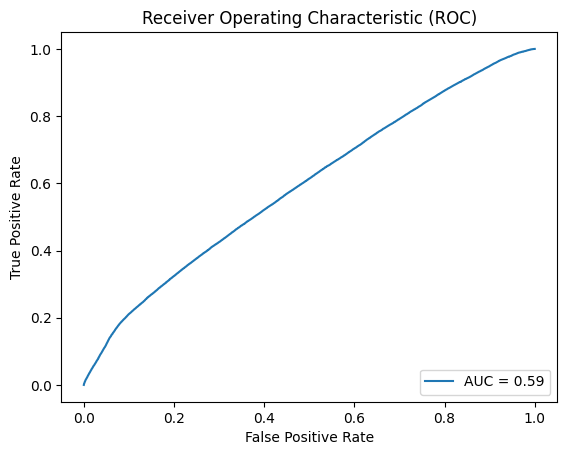

AUC Score: 0.5937898616634426


In [22]:
y_pred_proba = xgb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label= 'AUC = %0.2f' % auc)
plt.legend(loc=4)
plt.title('Receiver Operating Characteristic (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC Score:', auc)

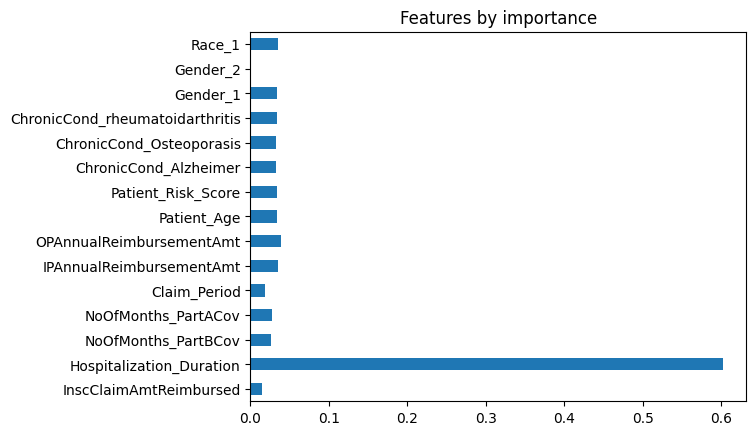

In [23]:
feat_importances = pd.Series(xgb.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.plot(kind='barh')
plt.title("Features by importance")
plt.show()

In [24]:
feat_importances

InscClaimAmtReimbursed             0.014789
Hospitalization_Duration           0.602223
NoOfMonths_PartBCov                0.026449
NoOfMonths_PartACov                0.027057
Claim_Period                       0.018697
IPAnnualReimbursementAmt           0.035465
OPAnnualReimbursementAmt           0.039039
Patient_Age                        0.034272
Patient_Risk_Score                 0.033513
ChronicCond_Alzheimer              0.032830
ChronicCond_Osteoporasis           0.032989
ChronicCond_rheumatoidarthritis    0.034144
Gender_1                           0.033415
Gender_2                           0.000000
Race_1                             0.035119
dtype: float32

In [25]:
clf = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=7,feature_names=list(df.columns))


In [26]:
#function inputs X:features.Y: Target, classifer: sklearn classifier, K:folds in cross validation, scoring: evaluation metric(f1)
def my_eval(X, y, classifer = clf, k=10, scoring = 'f1'):
    scores = []
    for i in range(5):
        #### generate random numbers to shuffle the data for training and test
        np.random.seed(2021)
        random_int = np.random.randint(0,3000)
        #### create cross validation folds
        kfold = model_selection.KFold(n_splits=k, random_state=random_int, shuffle=True)
        #### record the score
        score = model_selection.cross_val_score(clf, X=X, y=y, cv=kfold, scoring=scoring)
        scores.append(score)
    scores = np.array(scores)
    #### we need to calculate the bias (average score) and viariance (std)
    bias, variance = round(scores.mean(),4), round(scores.std(),4)
    return(bias, variance)

In [27]:

# Resampling and Balancing the data
sm = SMOTE(random_state = 2021)
X_res, Y_res = sm.fit_resample(x_train, y_train)

In [28]:
#average f1_score from 10-fold CV
clf = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=7)
my_eval(X_res, Y_res, clf, 10)

(0.5797, 0.0024)

In [29]:
#average ROC_AUC from 10-fold CV
my_eval(X_res, Y_res, clf, 10, 'roc_auc')

(0.7237, 0.0014)

In [30]:
grp = ['Provider','PotentialFraud','PredictedFraud']

In [31]:
df_pred = df_pred[grp]

In [32]:
df_ratio = df_pred.groupby(by=['Provider']).sum()

In [33]:
df_ratio['Ratio'] = df_ratio['PredictedFraud'] / df_ratio['PotentialFraud']
df_ratio.sort_values(by=['Ratio'],ascending=False)

,PotentialFraud,PredictedFraud,Ratio
Provider,,,
PRV53135,2,1,0.500000
PRV55412,4,2,0.500000
PRV56046,2,1,0.500000
PRV54720,2,1,0.500000
PRV51178,21,9,0.428571
...,...,...,...
PRV55670,4,0,0.000000
PRV55918,6,0,0.000000
PRV56118,6,0,0.000000


In [34]:
df_ratio.describe().T

,count,mean,std,min,25%,50%,75%,max
PotentialFraud,294.0,181.210884,303.825557,0.0,28.00000,70.500000,205.500000,3249.0
PredictedFraud,294.0,36.350340,60.412488,0.0,5.00000,16.000000,42.750000,640.0
Ratio,293.0,0.202163,0.078110,0.0,0.17193,0.202899,0.235955,0.5


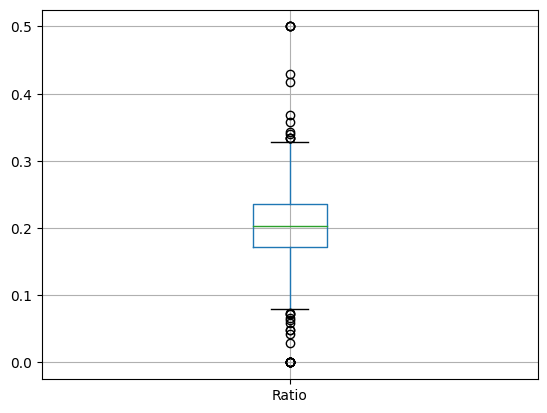

In [35]:
df_ratio.boxplot(column=['Ratio'], return_type='axes');


In [36]:
df_ratio['Ratio'].quantile([0.25, 0.7, 0.9])

0.25    0.171930
0.70    0.226813
0.90    0.279556
Name: Ratio, dtype: float64